# Project: Wrangling and Analyze Data

## Data Gathering


In [6]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Read CSV

df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [8]:
# Download file using Requests library via URL provided 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [9]:
# Read TSV 
# Save the file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# Read TSV file
df_image = pd.read_csv('image-predictions.tsv', sep = '\t')

df_image.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
df_list = []
with open('tweet_json.txt', 'r') as file:
    text = file.readlines()
    for line in text:
        text_json = json.loads(line)
        df_list.append({'tweet_id': text_json['id'],
                        'retweet_count': text_json['retweet_count'],
                        'favorite_count': text_json['favorite_count']})
        
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

tweet_json.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# --------------------------------------------------------------------------------------
## Assessing Data



### 1. twitter archive (df_archive)

In [11]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


**Here are the description for the df_archive columns  :**

- **tweet_id**: the unique identifier for each tweet
- **in_reply_to_status_id**: in case the tweet is a reply, this column will representing the original tweet id
- **in_reply_to_user_id**: in case the tweet is a reply, this column will representing the original tweet's user id
- **timestamp**: date and time of the tweet
- **source**: the origin of the tweet
- **text**: the content of the tweet
- **retweeted_status_id**: if the tweet is retweet, this column will representing the original tweet id
- **retweeted_status_user_id**: if the tweet is retweet, this column will representing the original tweet's user id
- **retweeted_status_timestamp**: if the tweet is retweet, this column will representing the original tweet's time stamp
- **expanded_urls**: URL of the tweet
- **rating_numerator**: rating numerator of the dog mentioned in the tweet
- **rating_denominator**: rating denominator of the dog mentioned in the tweet
- **name**: the name of the dog
- **doggo/ floofer/ pupper/ puppo**: names of different dog species at different ages.

In [14]:
df_archive.duplicated().sum()

0

In [15]:
df_archive.tweet_id.duplicated().sum()

0

In [16]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [17]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [20]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

**Some of our Observations:**

- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are float, should all be int
- only need original ratings with pictures, retweets and replies entries should be removed, , related columns should be removed too. The picture part will be fixed later.
- timestamp is str, should be datetime, remove +0000 in timestamp
- doggo, floofer, pupper, puppo are all stages of dog, should be in one column
- abnormal values in rating_denominator, e.g., 170, 150, 130, etc. The rating_denominator is almost always 10
- abnormal values in rating_numerator, e.g., 1776, 960, 666, 204, 165,etc. make no sense. 
- source info redundent, not easy to read

### 2. Image prediction(df_image)

In [21]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [22]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


**df_image columns description :**

- **tweet_id**: the unique identifier of the tweet
- **jpg_url**: the URL of the image
- **img_num**: the image number of the tweet
- **p1**: the first prediction of the image with the most prediction confidence
- **p1_conf**: how confident the algorithm is in the first prediction
- **p1_dog**: whether or not the first prediction is a dog
- **p2**: the second prediction of the image with the second prediction confidence
- **p2_conf**: how confident the algorithm is in the second prediction
- **p2_dog**: whether or not the second prediction is a dog
- **p3**: the third prediction of the image with the third prediction confidence
- **p3_conf**: how confident the algorithm is in the third prediction
- **p3_dog**: whether or not the third prediction is a dog

In [24]:
df_image.tweet_id.duplicated().sum()

0

In [25]:
df_image.jpg_url.duplicated().sum()

66

In [98]:
df_image.p1.value_counts()

golden retriever             150
labrador retriever           100
pembroke                     89 
chihuahua                    83 
pug                          57 
chow                         44 
samoyed                      43 
toy poodle                   39 
pomeranian                   38 
malamute                     30 
cocker spaniel               30 
french bulldog               26 
chesapeake bay retriever     23 
miniature pinscher           23 
seat belt                    22 
german shepherd              20 
siberian husky               20 
staffordshire bullterrier    20 
cardigan                     19 
web site                     19 
shetland sheepdog            18 
teddy                        18 
eskimo dog                   18 
maltese dog                  18 
beagle                       18 
lakeland terrier             17 
shih-tzu                     17 
rottweiler                   17 
kuvasz                       16 
italian greyhound            16 
          

In [27]:
df_image.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
miniature_pinscher                 20
chow                               20
toy_terrier                        20
Samoyed                            20
malinois                           20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [28]:
df_image.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

**Observations:**

- Bad column name (p1,p2,p3)
- incorrect use of capital letters in p1,p2,p3
- Duplicates images url
- We also have other animals e.g. jaguar, mailbox, peacock, cloak, etc. in our data file


### 3. tweeter json (tweet_json)

In [29]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [30]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [31]:
tweet_json.duplicated().sum()

0

## ---------------------------------------------------------------------------------------



### Quality issues

**twitter-archive-enhanced table**

- Bad type of the timestamp columns (must be date time not string);
- Abnormal values for rating_numerator, rating_denominator columns, e.g., 170, 150, 130, etc.; 
- Keep only date for timestamp columns;
- Rename timestamp column;
- Timestamp type is str, should be datetime, and we should remove +0000 in timestamp;
- The tweet_id columns must be string not integer;
- Drop None dog names;
- Drop useless columns.


**Image prediction table**

- many entries are not dogs, e.g., jaguar, mailbox, peacock, cloak, etc.
- bad capitalisation in first letters for breeds dogs; 
- Underscore for many breed dogs names; 
- jpg url duplicates;
- Convert the numbers to percentage format;
- The right predictions; 
- No need for source of JPG url;
- Drop useless columns.

**retweet table**

- Tweet_id column type is a string.
- Some missing data

### Tidiness issues

- Merging doggo, floofer, pupper, puppo to one column;
- Assembling many parts of 3 tables in same table.


In [32]:
# Let's make a copys for all our data

df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
tweet_json_clean = tweet_json.copy()

## ---------------------------------------------------------------------------------------

### Quality issues

**1.df_archive**: we only want original ratings



In [35]:
# Let's remove retweets
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]

# Let's remove replies
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_status_id.isnull()]

In [37]:
# Let's check the result

df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

**2. df_archive:** we must drop retweets and replies columns. 

In [38]:
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id', 
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'],axis=1)

In [39]:
# Let's check the result

df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


**3. df_archive:** datatype for timestamp should be datetime, and we should remove +0000

In [40]:
# Let's remove +0000
df_archive_clean.timestamp = df_archive_clean.timestamp.str[:-6]

# Convert to datetime
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

In [41]:
# Let's check the result

df_archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

**4. df_archive**: abnormal values in rating_denominator.

In [42]:
# Let's create a new dataframe with selected columns
df_abnormal_rating = df_archive_clean[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

# Filter rating_denominator not equal to 10
df_abnormal_denominator = df_abnormal_rating.query('rating_denominator != 10')

# Display full text
pd.set_option('display.max_colwidth', -1)

df_abnormal_denominator

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [46]:
# Let's correct ratings by reading through the text
# the tweet_id: 666287406224695296
df_archive_clean.loc[df_archive_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9
df_archive_clean.loc[df_archive_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10
# the tweet_id: 697463031882764288 
df_archive_clean.loc[df_archive_clean.tweet_id  == 697463031882764288, 'rating_numerator'] = 11
df_archive_clean.loc[df_archive_clean.tweet_id  == 697463031882764288, 'rating_denominator'] = 10
# the tweet_id: 684222868335505415 
df_archive_clean.loc[df_archive_clean.tweet_id  == 684222868335505415, 'rating_numerator'] = 11
df_archive_clean.loc[df_archive_clean.tweet_id  == 684222868335505415, 'rating_denominator'] = 10
# the tweet_id: 682962037429899265 
df_archive_clean.loc[df_archive_clean.tweet_id  == 682962037429899265, 'rating_numerator'] = 10
df_archive_clean.loc[df_archive_clean.tweet_id  == 682962037429899265, 'rating_denominator'] = 10
# the tweet_id: 710658690886586372 
df_archive_clean.loc[df_archive_clean.tweet_id  == 710658690886586372, 'rating_numerator'] = 10
df_archive_clean.loc[df_archive_clean.tweet_id  == 710658690886586372, 'rating_denominator'] = 10
# the tweet_id: 713900603437621249 
df_archive_clean.loc[df_archive_clean.tweet_id  == 713900603437621249, 'rating_numerator'] = 11
df_archive_clean.loc[df_archive_clean.tweet_id  == 713900603437621249, 'rating_denominator'] = 10
# the tweet_id: 709198395643068416 
df_archive_clean.loc[df_archive_clean.tweet_id  == 709198395643068416, 'rating_numerator'] = 9
df_archive_clean.loc[df_archive_clean.tweet_id  == 709198395643068416, 'rating_denominator'] = 10
# the tweet_id: 722974582966214656 
df_archive_clean.loc[df_archive_clean.tweet_id  == 722974582966214656, 'rating_numerator'] = 13
df_archive_clean.loc[df_archive_clean.tweet_id  == 722974582966214656, 'rating_denominator'] = 10
# the tweet_id: 716439118184652801
df_archive_clean.loc[df_archive_clean.tweet_id  == 716439118184652801, 'rating_numerator'] = 11
df_archive_clean.loc[df_archive_clean.tweet_id  == 716439118184652801, 'rating_denominator'] = 10
# the tweet_id: 704054845121142784 
df_archive_clean.loc[df_archive_clean.tweet_id  == 704054845121142784, 'rating_numerator'] = 12
df_archive_clean.loc[df_archive_clean.tweet_id  == 704054845121142784, 'rating_denominator'] = 10
# the tweet_id: 677716515794329600 
df_archive_clean.loc[df_archive_clean.tweet_id  == 677716515794329600, 'rating_numerator'] = 12
df_archive_clean.loc[df_archive_clean.tweet_id  == 677716515794329600, 'rating_denominator'] = 10
# the tweet_id: 675853064436391936 
df_archive_clean.loc[df_archive_clean.tweet_id  == 675853064436391936, 'rating_numerator'] = 11
df_archive_clean.loc[df_archive_clean.tweet_id  == 675853064436391936, 'rating_denominator'] = 10
# the tweet_id: 810984652412424192  
df_archive_clean.loc[df_archive_clean.tweet_id  == 810984652412424192, 'rating_numerator'] = 10
df_archive_clean.loc[df_archive_clean.tweet_id  == 810984652412424192, 'rating_denominator'] = 10
# the tweet_id: 820690176645140481 
df_archive_clean.loc[df_archive_clean.tweet_id  == 820690176645140481, 'rating_numerator'] = 12
df_archive_clean.loc[df_archive_clean.tweet_id  == 820690176645140481, 'rating_denominator'] = 10
# the tweet_id: 731156023742988288 
df_archive_clean.loc[df_archive_clean.tweet_id  == 731156023742988288, 'rating_numerator'] = 12
df_archive_clean.loc[df_archive_clean.tweet_id  == 731156023742988288, 'rating_denominator'] = 10
# the tweet_id: 758467244762497024 
df_archive_clean.loc[df_archive_clean.tweet_id  == 758467244762497024, 'rating_numerator'] = 11
df_archive_clean.loc[df_archive_clean.tweet_id  == 758467244762497024, 'rating_denominator'] = 10
# the tweet_id: 740373189193256964
df_archive_clean.loc[df_archive_clean.tweet_id  == 740373189193256964, 'rating_numerator'] = 14
df_archive_clean.loc[df_archive_clean.tweet_id  == 740373189193256964, 'rating_denominator'] = 10

In [47]:
#Let's check the result 

df_archive_clean.rating_denominator.value_counts()

10    2097
Name: rating_denominator, dtype: int64

**7. twitter_archive**: abnormal values in rating_numerator.

In [48]:
df_archive_clean.rating_numerator.value_counts()

12      490
10      439
11      419
13      288
9       154
8       98 
7       51 
14      39 
5       34 
6       32 
3       19 
4       15 
2       9  
1       4  
75      1  
420     1  
26      1  
27      1  
1776    1  
0       1  
Name: rating_numerator, dtype: int64

In [49]:
# rating_numerator 75, 26, 27, 0
df_abnormal_rating.query('rating_numerator == 75 or rating_numerator == 26 or rating_numerator == 27 or rating_numerator == 0')

,tweet_id,text,rating_numerator,rating_denominator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [50]:
# Let's correct the ratings
# the tweet_id: 786709082849828864, rating _numerator should be 9.75 according to the text
df_archive_clean.loc[df_archive_clean.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75
# tweet_id: 680494726643068929, rating _numerator should be 11.26 according to the text
df_archive_clean.loc[df_archive_clean.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26
# tweet_id: 778027034220126208, rating _numerator should be 11.27 according to the text
df_archive_clean.loc[df_archive_clean.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27
# tweet_id: 835152434251116546
df_archive_clean.loc[df_archive_clean.tweet_id == 835152434251116546, 'rating_numerator'] = 11
# tweet_id: 883482846933004288
df_archive_clean.loc[df_archive_clean.tweet_id == 883482846933004288, 'rating_numerator'] = 13.5

In [51]:
# rating_numerator with value 3 and 4
df_abnormal_rating.query('rating_numerator == 3 or rating_numerator == 4')

,tweet_id,text,rating_numerator,rating_denominator
765,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3,10
883,760252756032651264,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,4,10
912,757596066325864448,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,4,10
1004,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,4,10
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1189,718246886998687744,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3,10
1219,714631576617938945,This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,4,10
1249,711306686208872448,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,3,10
1303,707420581654872064,This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,4,10
1314,706901761596989440,This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu,3,10


**All the value above are not about Dogs, so we should delete them**

In [53]:
# Remove those entries 
id_list = [777885040357281792, 760252756032651264,757596066325864448,747816857231626240,722974582966214656,718246886998687744,714631576617938945,711306686208872448,707420581654872064,706901761596989440,699088579889332224,695064344191721472,693590843962331137,686003207160610816,684567543613382656,681302363064414209,680940246314430465,676098748976615425,674690135443775488,674045139690631169,673906403526995968,673715861853720576,673700254269775872,671122204919246848,670838202509447168,670055038660800512,668989615043424256,668981893510119424,668643542311546881,668466899341221888,667937095915278337,667176164155375616,666837028449972224,666649482315059201,666293911632134144]
df_archive_clean = df_archive_clean[~df_archive_clean.tweet_id.isin(id_list)]

In [56]:
#Let's check the result
df_archive_clean.rating_numerator.value_counts()

12.00      490
10.00      439
11.00      420
13.00      287
9.00       154
8.00       98 
7.00       51 
14.00      39 
5.00       33 
6.00       32 
2.00       9  
1.00       4  
9.75       1  
11.26      1  
11.27      1  
13.50      1  
420.00     1  
1776.00    1  
Name: rating_numerator, dtype: int64

**NB :** there are still other rating issues and it's not practical to read each of these.



**8. Image prediction table :** Bad capitalisation for first letters for breeds dogs

In [58]:
#list of columns which we will apply the lower() method
image_prediction = ['p1', 'p2', 'p3']
for ele in image_prediction:
    #Let's do a lambda function on values in each column
    df_image[str(ele)] = df_image[str(ele)].apply(lambda x: x.lower())

In [59]:
#Let's check the result 

df_image.p1.sample(10)

1310    chow               
1940    envelope           
1578    golden_retriever   
723     rhodesian_ridgeback
1298    bedlington_terrier 
982     chihuahua          
1853    web_site           
321     chimpanzee         
1617    home_theater       
300     hermit_crab        
Name: p1, dtype: object

**9. Image prediction table :** Underscore for many breed dogs names

In [60]:
# Let's reuse the image_prediction list to correct this issue 
for ele in image_prediction:
    df_image[str(ele)] = df_image[str(ele)].str.replace('_', ' ')

In [62]:
#Let's check the result 

df_image.p1.sample(10)

516     golden retriever    
119     chihuahua           
1026    pembroke            
1101    chihuahua           
619     space heater        
707     bernese mountain dog
722     damselfly           
906     beagle              
262     beagle              
1428    basset              
Name: p1, dtype: object

**10. image prediction table/Twitter archive and tweet json**: There are entries that are not dogs and should be remove

In [65]:
# Filter posts that are not dogs and put those tweet_id into a drop_list
df_image_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id
all_drop_list = df_image_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id

# Drop the rows with tweet_id in the drop_list in all dataframes
df_image_clean = df_image_clean[~df_image_clean.tweet_id.isin(all_drop_list)]
df_archive_clean = df_archive_clean[~df_archive_clean.tweet_id.isin(all_drop_list)]
tweet_json_clean = tweet_json_clean[~tweet_json_clean.tweet_id.isin(all_drop_list)]

In [67]:
print(df_image_clean.shape)
print(df_archive_clean.shape)
print(tweet_json_clean.shape)


(1751, 12)
(1780, 12)
(2031, 3)


**10. image prediction :** we only need the most confident prediction for the image


In [69]:
# Let's create two new columns : breed and confident_lvl
breed = []
confident_lvl = []

# Create a function to find the most confident prediction that is a dog breed
# p1 is the most confident prediction, followed by p2 and p3

def image_prediction(df_image_clean):
    if df_image_clean.p1_dog == True:
        breed.append(df_image_clean.p1)
        confident_lvl.append(df_image_clean.p1_conf)
    elif df_image_clean.p2_dog == True:
        breed.append(df_image_clean.p2)
        confident_lvl.append(df_image_clean.p2_conf)
    elif df_image_clean.p3_dog == True:
        breed.append(df_image_clean.p3)
        confident_lvl.append(df_image_clean.p3_conf)
    else:
        breed.append('Unknown breed race')
        confident_lvl.append(0)
        
# Apply the function by column        
df_image_clean.apply(image_prediction, axis=1)

# Add the breed and confident_level column to image_prediction_clean 
df_image_clean['breed'] = breed
df_image_clean['confident_lvl'] = confident_lvl

# Drop columns no longer needed
df_image_clean = df_image_clean.drop(['img_num',
                                                      'p1','p1_conf','p1_dog',
                                                      'p2','p2_conf','p2_dog',
                                                      'p3','p3_conf','p3_dog'],axis=1)

In [70]:
#Let's test our result 

df_image_clean.head()

,tweet_id,jpg_url,breed,confident_lvl
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


## ---------------------------------------------------------------------------------------


### Tidiness issues

**1. Twitter archive table:** Merging doggo, floofer, pupper, puppo columns to one column



In [71]:
df_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1490
1,None,None,None,puppo,22
2,None,None,pupper,None,186
3,None,floofer,None,None,9
4,doggo,None,None,None,63
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,8
7,doggo,floofer,None,None,1


In [72]:
# convert None or NaN values to empty value
df_archive_clean.doggo.replace('None', '', inplace=True)
df_archive_clean.doggo.replace('np.NaN', '', inplace=True)
df_archive_clean.floofer.replace('None', '', inplace=True)
df_archive_clean.floofer.replace('np.NaN', '', inplace=True)
df_archive_clean.pupper.replace('None', '', inplace=True)
df_archive_clean.pupper.replace('np.NaN', '', inplace=True)
df_archive_clean.puppo.replace('None', '', inplace=True)
df_archive_clean.puppo.replace('np.NaN', '', inplace=True)

In [76]:
# create a new stage column that will group the 4 columns stages 
df_archive_clean['stage'] = df_archive_clean.doggo + df_archive_clean.floofer + df_archive_clean.pupper + df_archive_clean.puppo
df_archive_clean.loc[df_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_archive_clean.loc[df_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_archive_clean.loc[df_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [78]:
df_archive_clean = df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [79]:
#Let's test the result 

df_archive_clean.stage.value_counts()

                  1490
pupper            186 
doggo             63  
puppo             22  
floofer           9   
doggo, pupper     8   
doggo, floofer    1   
doggo, puppo      1   
Name: stage, dtype: int64

**2. Merge some part of our data table in one column**

In [82]:
#left merging df_archive_clean and df_image_clean on tweet_id
dog_rates_1 = pd.merge(df_archive_clean, df_image_clean, how = 'left', on = ['tweet_id'])

#left merging dog_rates_1 and tweet_json_clean on tweet_id 
dog_rates = pd.merge(dog_rates_1, tweet_json_clean, how = 'left', on = ['tweet_id'])

In [83]:
#Lets check the result 

dog_rates.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,breed,confident_lvl,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
2,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908
3,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048
4,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,None,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,3261,20562


**Let's save ourdata in a csv file**

In [85]:
dog_rates.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## ---------------------------------------------------------------------------------------


## Analyzing and Visualizing Data


In [88]:
#Let's load our previous data

df_tweeter = pd.read_csv('twitter_archive_master.csv')
df_tweeter.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,breed,confident_lvl,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
2,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908
3,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048
4,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,3261,20562


In [89]:
df_tweeter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 14 columns):
tweet_id              1780 non-null int64
timestamp             1780 non-null object
source                1780 non-null object
text                  1780 non-null object
expanded_urls         1777 non-null object
rating_numerator      1780 non-null float64
rating_denominator    1780 non-null int64
name                  1780 non-null object
stage                 290 non-null object
jpg_url               1654 non-null object
breed                 1654 non-null object
confident_lvl         1654 non-null float64
retweet_count         1780 non-null int64
favorite_count        1780 non-null int64
dtypes: float64(2), int64(4), object(8)
memory usage: 194.8+ KB


### Insights:

**1.Let's see the most popular breed dog**



(0, 175)

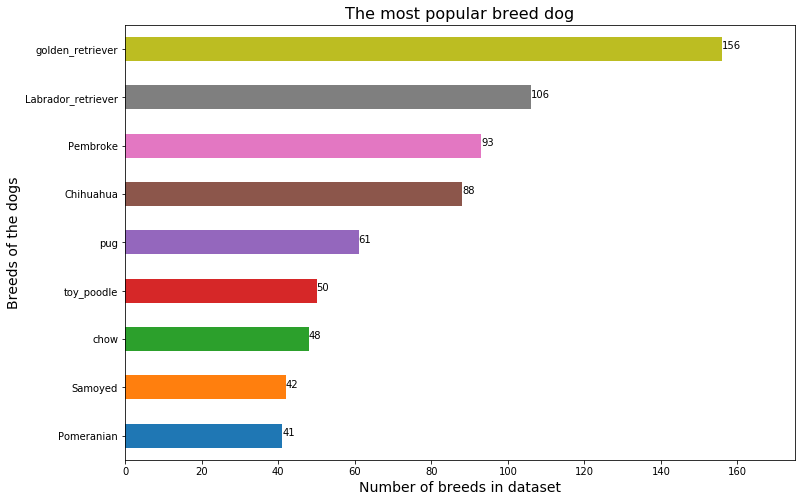

In [93]:
# grouping by breed_dog column and return the number of items in this grouped dataframe by dog breed 
popular_breed = df_tweeter.groupby('breed').filter(lambda x: len(x) >= 40)

# plotting the ascending value
count_breed = popular_breed.breed.value_counts(ascending = True)
count_breed.plot(kind = 'barh', figsize = [12, 8])

#display each bar value
for index, value in enumerate(count_breed):
    plt.text(value, index, str(value))
    
plt.title('The most popular breed dog', fontsize = 16)
plt.xlabel('Number of breeds in dataset', fontsize = 14)
plt.ylabel('Breeds of the dogs', fontsize = 14)
plt.xlim(0, 175) # limiting the X axis on 175 



**2. The dog breed who get the most high retweet**

(0, 8500)

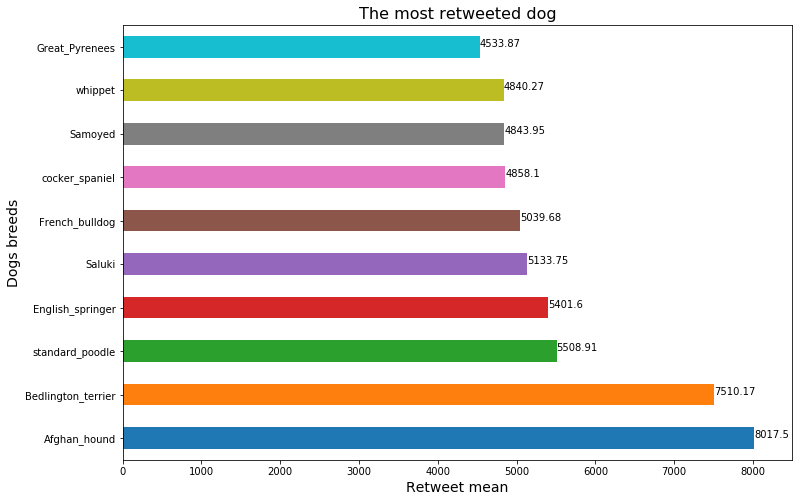

In [96]:
# Top 10 hight retweeted breed dogs 
high_retweet = df_tweeter.groupby('breed').retweet_count.mean().round(2).sort_values(ascending = False).iloc[:10]

# plotting the high retweeted breed
high_retweet.plot(kind='barh', figsize=[12, 8])

# adding the text values to each bar in chart 
for index, value in enumerate(high_retweet):
    plt.text(value, index, float(value))

plt.title('The most retweeted dog', fontsize = 16) 
plt.xlabel('Retweet mean', fontsize = 14)
plt.ylabel('Dogs breeds', fontsize = 14)
plt.xlim(0, 8500) # limiting the X-axis on 8500 


As we can see, the most retweeted breed dog for the @dog_rates page users is `Standard poodle`

**3.The dog breed get the most high favorite counting**

(0, 33500)

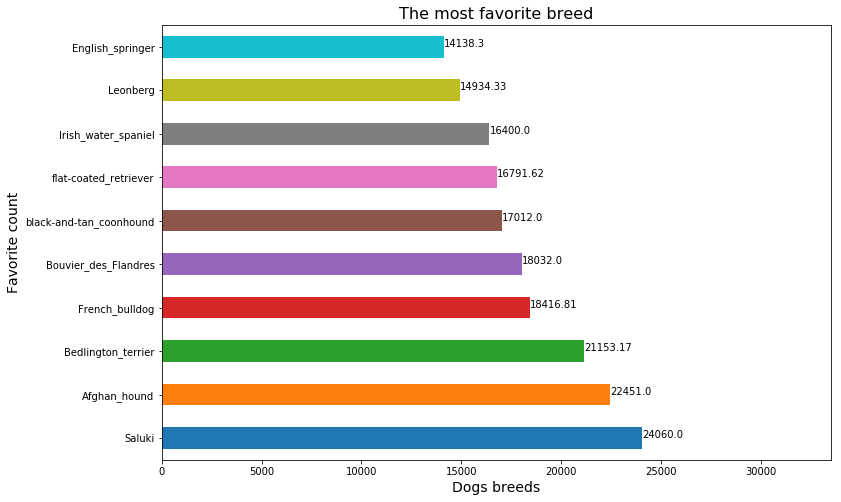

In [97]:
# The top 10 hight favorited breed dogs 
high_favorite = df_tweeter.groupby('breed').favorite_count.mean().round(2).sort_values(ascending = False).iloc[:10]

# plotting the high retweeted breed
high_favorite.plot(kind='barh', figsize=[12, 8])

# adding the text values to each bar in chart
for index, value in enumerate(high_favorite):
    plt.text(value, index, float(value))
    
    
plt.title('The most favorite breed', fontsize = 16)
plt.xlabel('Dogs breeds', fontsize = 14)
plt.ylabel('Favorite count', fontsize = 14)
plt.xlim(0, 33500) # limiting the Y-axis on 33500 


As we can see, the most favorited breed dog for @dog_rates page users is `Bedlington terrier`